In [1]:
from pathlib import Path
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 24
folders = ['frenchie', 'boston-terrier', 'pug']
path    = Path('../data/frenchie_like/')

In [ ]:
for dog in folders:
    dest = path/dog
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/f'{dog}.csv', dest, max_pics=500)

In [ ]:
for dog in folders:
    print(dog)
    verify_images(path/dog, delete=True, max_size=500)

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(),
                                  size=224, bs=bs, num_workers=4).normalize(imagenet_stats)

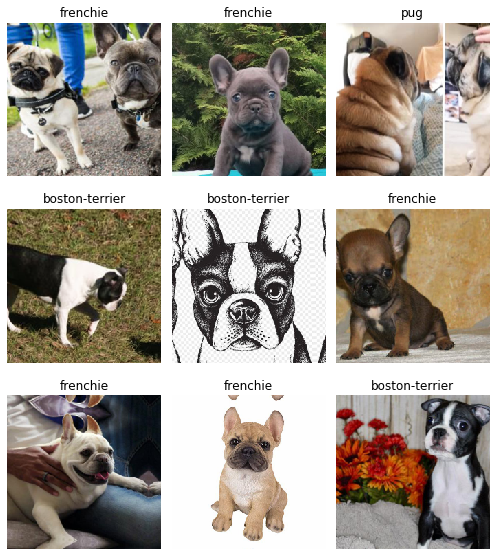

In [5]:
data.show_batch(rows=3, figsize=(7,8))

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['boston-terrier', 'frenchie', 'pug'], 3, 1116, 278)

In [7]:
learn = cnn_learner(data, models.resnet101, metrics=error_rate)

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.742191,0.531793,0.100719,00:12
1,0.490878,0.336486,0.075540,00:09
2,0.367976,0.297735,0.075540,00:09
3,0.250004,0.256482,0.079137,00:09


In [9]:
learn.save('frenchie-finder-v1')

In [10]:
learn.unfreeze()

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


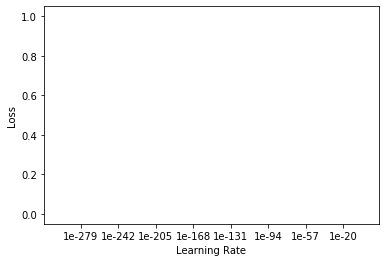

In [12]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-4))

In [ ]:
learn.save('frenchie-finder-v2')

In [ ]:
learn.unfreeze()

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

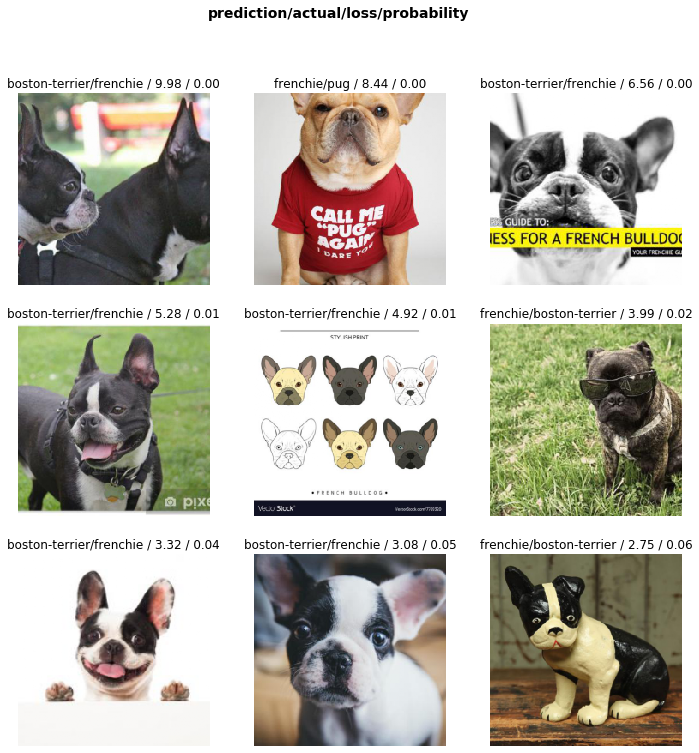

In [14]:
interp.plot_top_losses(9)

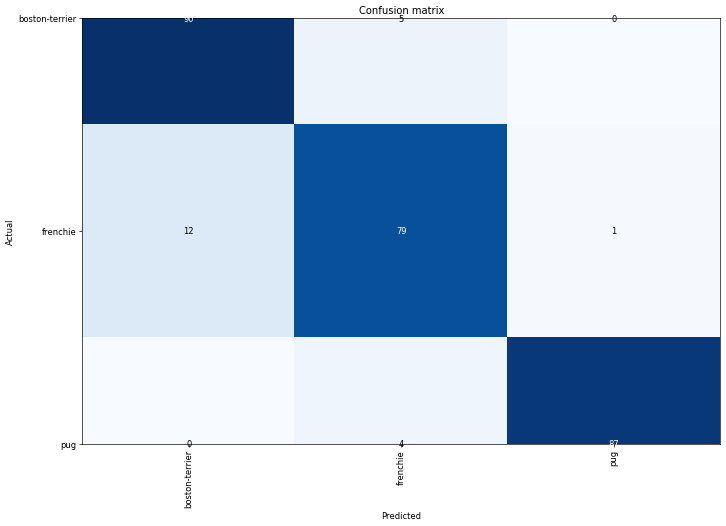

In [15]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [16]:
from fastai.widgets import *

In [17]:
db = (ImageList.from_folder(path)
                     .split_none()
                     .label_from_folder()
                     .transform(get_transforms(), size=224)
                     .databunch()
     )
      

In [18]:
learn_cln = cnn_learner(db, models.resnet101, metrics=error_rate)
learn_cln.load('frenchie-finder-v2')

Learner(data=ImageDataBunch;

Train: LabelList (1394 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
frenchie,frenchie,frenchie,frenchie,frenchie
Path: ../data/frenchie_like;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: ../data/frenchie_like;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

In [19]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [20]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())